In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("admission_pred.csv")
ds.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [3]:
ds.drop(['Serial No.'],axis=1,inplace=True)
ds.drop(['SOP'],axis=1,inplace=True)
ds.drop(['LOR '],axis=1,inplace=True)

In [4]:
print(ds.columns.values)

['GRE Score' 'TOEFL Score' 'University Rating' 'CGPA' 'Research'
 'Chance of Admit ']


In [5]:
print(ds.isnull().sum())

GRE Score            0
TOEFL Score          0
University Rating    0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [6]:
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(2), int64(4)
memory usage: 23.6 KB
None


In [7]:
ds=ds.rename(columns = {'Chance of Admit ':'Chance of Admit'})
ds['Chance of Admit'] = np.where(ds['Chance of Admit']>0.5,1,0)
ds.head(5)

,GRE Score,TOEFL Score,University Rating,CGPA,Research,Chance of Admit
0,337,118,4,9.65,1,1
1,324,107,4,8.87,1,1
2,316,104,3,8.00,1,1
3,322,110,3,8.67,1,1
4,314,103,2,8.21,0,1


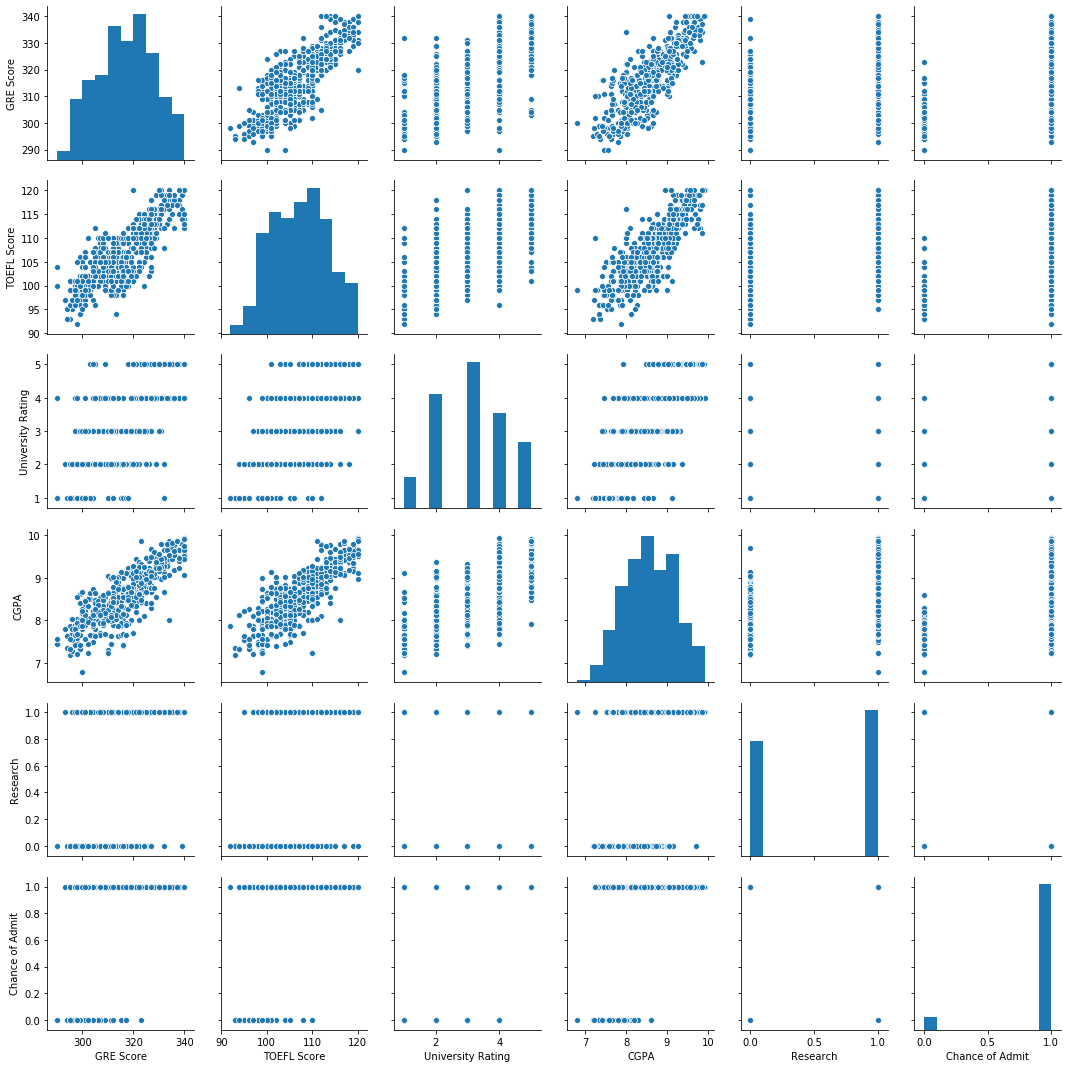

In [8]:
sns.pairplot(ds)
plt.show()

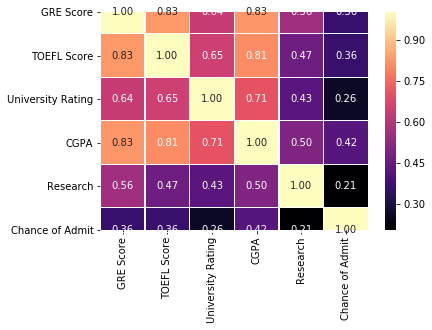

In [9]:
sns.heatmap(ds.corr(),annot=True,linewidths=0.20,fmt = '.2f',cmap='magma')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

y = ds['Chance of Admit']
X = ds.iloc[:,:5].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,shuffle=False)

In [11]:
from sklearn.tree import DecisionTreeClassifier

mdl = DecisionTreeClassifier(random_state=42,max_depth=4)
mdl.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [12]:
from sklearn.metrics import accuracy_score

y_pred = mdl.predict(X_test)

print(accuracy_score(y_pred,y_test))

0.92


In [13]:
from sklearn.ensemble import BaggingClassifier

num_trees = 100
bc = BaggingClassifier(base_estimator=mdl, n_estimators=num_trees, random_state=42)

In [14]:
from sklearn.model_selection import cross_val_score

result = cross_val_score(bc,X,y,cv=5)

print("Model Accuracy Value: %.4f"%(result.mean()))

Model Accuracy Value: 0.9320


In [15]:
columns = list(ds.iloc[:,:5].columns)

In [16]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(mdl,out_file=None,feature_names=columns,class_names=True)

In [17]:
import graphviz

In [18]:
tree = graphviz.Source(dot_data)
tree.render("image",view=True)
file = open("C:\\Users\\P.Janani\\Desktop\\treeimage.txt","w+")
file.write(dot_data)
file.close()

In [19]:
from IPython.display import display

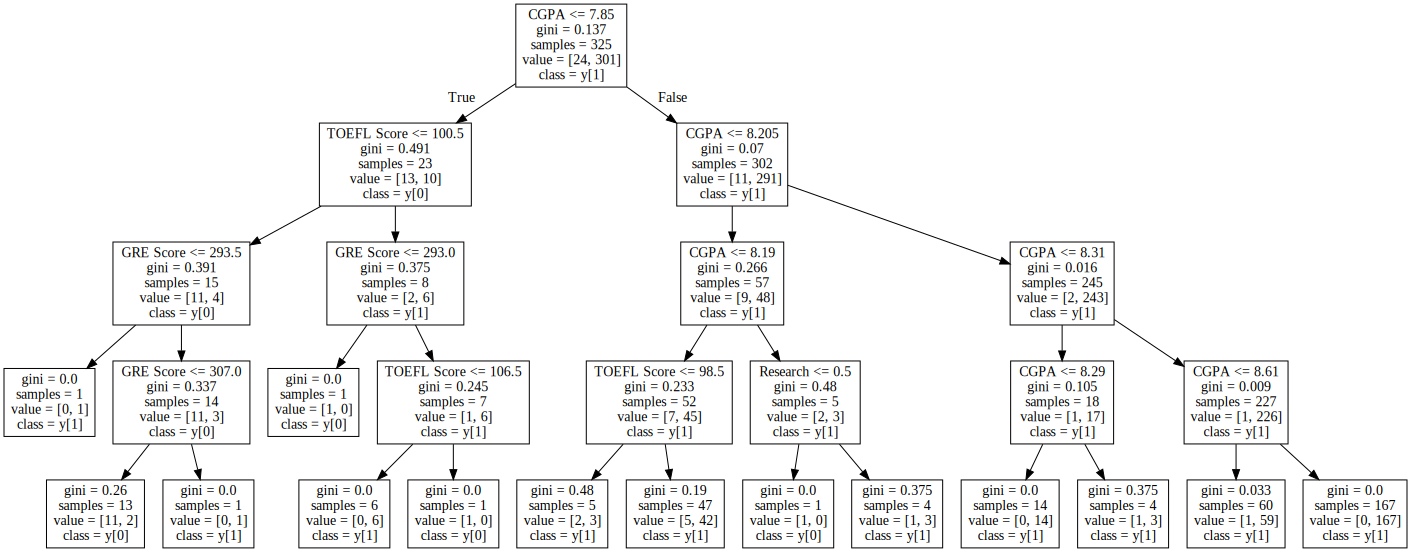

None


In [20]:
print(display(tree))